In this notebook we analyze more in depth the customer segmentation in order to see if we can gain insignts to leverage in the model training. 

In [1]:
# Cell 1: Imports and Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load data from star schema Excel file
file_path = "../../../00-Project/datasets/star_schema_dataset.xlsx"
fact_shipments = pd.read_excel(file_path, sheet_name='fact_shipment')
dim_customers = pd.read_excel(file_path, sheet_name='dim_customer')

In [3]:
# Merge fact and dimension tables
customer_data = pd.merge(
    fact_shipments,
    dim_customers[['customer_id', 'segmentation']],
    on='customer_id',
    how='left'
)

# Calculate key metrics per customer
customer_metrics = customer_data.groupby(['customer_id', 'segmentation']).agg({
    'expected_carrier_price': ['sum', 'mean', 'count'],
    'weight': 'mean'
}).reset_index()

# Rename columns for clarity
customer_metrics.columns = [
    'customer_id', 'segmentation', 'total_spend', 
    'avg_shipment_cost', 'shipment_count', 
    'avg_weight'
]

# Calculate summary statistics by segment
segment_summary = customer_metrics.groupby('segmentation').agg({
    'customer_id': 'count',
    'total_spend': ['mean', 'median', 'min', 'max'],
    'shipment_count': 'mean',
    'avg_shipment_cost': 'mean',
    'avg_weight': 'mean'
}).round(2)

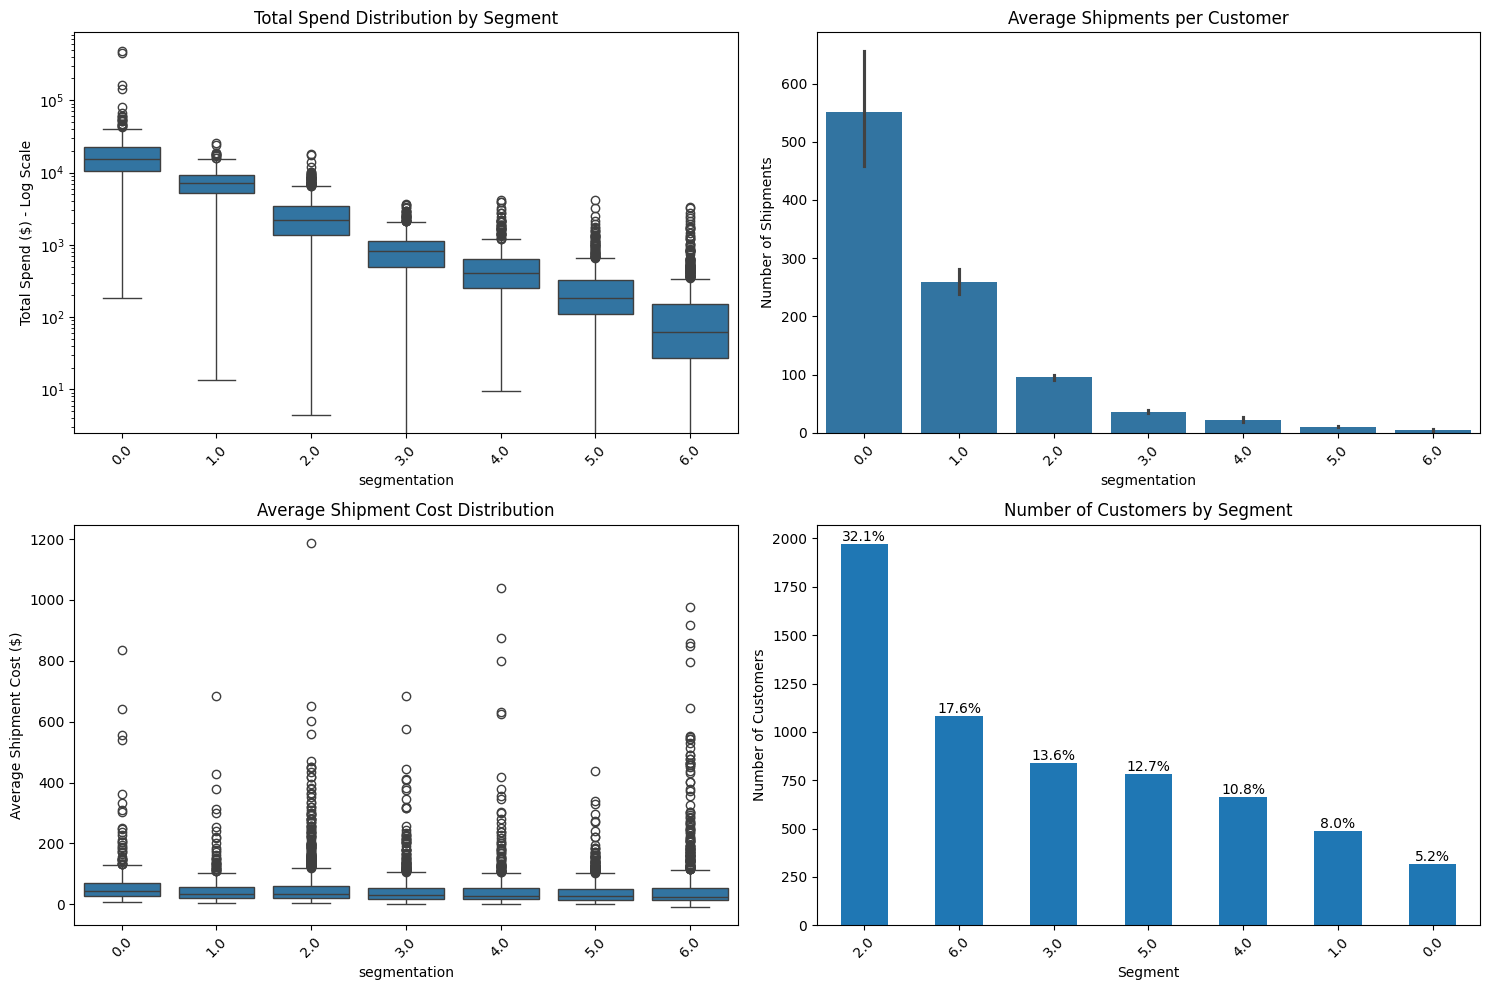

In [4]:
# Create Main Visualizations
plt.figure(figsize=(15, 10))

# 1. Box plot of total spend by segment with log scale
plt.subplot(2, 2, 1)
sns.boxplot(data=customer_metrics, x='segmentation', y='total_spend')
plt.yscale('log')  # Add log scale for better distribution visualization
plt.title('Total Spend Distribution by Segment')
plt.xticks(rotation=45)
plt.ylabel('Total Spend ($) - Log Scale')

# 2. Average shipments per customer by segment
plt.subplot(2, 2, 2)
sns.barplot(data=customer_metrics, x='segmentation', y='shipment_count')
plt.title('Average Shipments per Customer')
plt.xticks(rotation=45)
plt.ylabel('Number of Shipments')

# 3. Distribution of average shipment cost
plt.subplot(2, 2, 3)
sns.boxplot(data=customer_metrics, x='segmentation', y='avg_shipment_cost')
plt.title('Average Shipment Cost Distribution')
plt.xticks(rotation=45)
plt.ylabel('Average Shipment Cost ($)')

# 4. Customer count by segment with percentages
plt.subplot(2, 2, 4)
segment_counts = customer_metrics['segmentation'].value_counts()
ax = segment_counts.plot(kind='bar')
plt.title('Number of Customers by Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

# Add percentage labels on top of bars
total = len(customer_metrics)
for i, v in enumerate(segment_counts):
    ax.text(i, v, f'{(v/total)*100:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [5]:
# Calculate key statistics
summary = pd.DataFrame()
for segment in sorted(customer_metrics['segmentation'].unique()):
    segment_data = customer_metrics[customer_metrics['segmentation'] == segment]
    
    # Basic counts and spend statistics
    summary.loc[segment, 'Count'] = len(segment_data)
    summary.loc[segment, 'Min_Spend'] = segment_data['total_spend'].min()
    summary.loc[segment, 'Max_Spend'] = segment_data['total_spend'].max()
    summary.loc[segment, 'Median_Spend'] = segment_data['total_spend'].median()
    summary.loc[segment, 'Q1_Spend'] = segment_data['total_spend'].quantile(0.25)
    summary.loc[segment, 'Q3_Spend'] = segment_data['total_spend'].quantile(0.75)
    
    # Operational metrics
    summary.loc[segment, 'Avg_Shipments'] = segment_data['shipment_count'].mean()
    summary.loc[segment, 'Avg_Shipment_Cost'] = segment_data['avg_shipment_cost'].mean()
    summary.loc[segment, 'Avg_Weight'] = segment_data['avg_weight'].mean()

# Sort by median spend
summary = summary.sort_values('Median_Spend', ascending=False)

# Print comprehensive analysis
print("=== Customer Segmentation Analysis ===\n")

for segment in summary.index:
    print(f"\nSegment {segment}:")
    print(f"Number of customers: {summary.loc[segment, 'Count']:,.0f}")
    print(f"Spend range: ${summary.loc[segment, 'Min_Spend']:,.2f} to ${summary.loc[segment, 'Max_Spend']:,.2f}")
    print(f"Typical range (25-75th percentile): ${summary.loc[segment, 'Q1_Spend']:,.2f} to ${summary.loc[segment, 'Q3_Spend']:,.2f}")
    print(f"Median spend: ${summary.loc[segment, 'Median_Spend']:,.2f}")
    print(f"Average shipments per customer: {summary.loc[segment, 'Avg_Shipments']:,.1f}")
    print(f"Average shipment cost: ${summary.loc[segment, 'Avg_Shipment_Cost']:,.2f}")
    print(f"Average shipment weight: {summary.loc[segment, 'Avg_Weight']:,.1f}")

=== Customer Segmentation Analysis ===


Segment 0:
Number of customers: 318
Spend range: $186.52 to $487,065.43
Typical range (25-75th percentile): $10,618.42 to $22,808.89
Median spend: $15,477.46
Average shipments per customer: 550.8
Average shipment cost: $67.30
Average shipment weight: 24.1

Segment 1:
Number of customers: 490
Spend range: $13.39 to $25,378.23
Typical range (25-75th percentile): $5,148.76 to $9,261.14
Median spend: $7,091.49
Average shipments per customer: 258.9
Average shipment cost: $48.36
Average shipment weight: 14.5

Segment 2:
Number of customers: 1,972
Spend range: $4.50 to $18,281.32
Typical range (25-75th percentile): $1,355.48 to $3,454.70
Median spend: $2,235.29
Average shipments per customer: 95.0
Average shipment cost: $50.80
Average shipment weight: 15.8

Segment 3:
Number of customers: 837
Spend range: $0.00 to $3,692.38
Typical range (25-75th percentile): $489.90 to $1,129.24
Median spend: $809.88
Average shipments per customer: 35.6
Average shipme

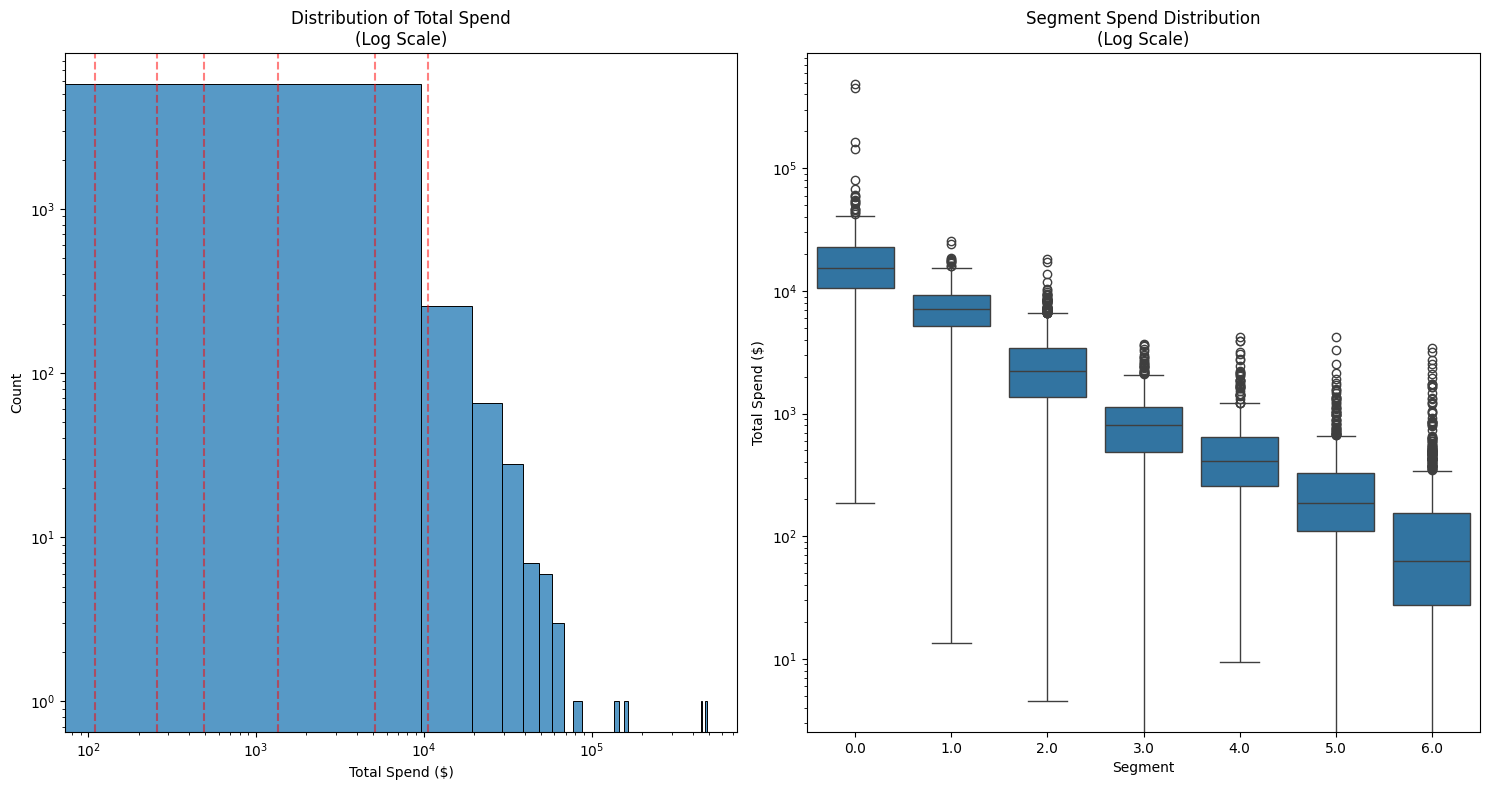


Spend Distribution Analysis:

Percentile Thresholds:
  5th percentile: $25.06
 20th percentile: $140.61
 40th percentile: $503.04
 60th percentile: $1,342.59
 80th percentile: $3,464.00
 95th percentile: $11,146.87

Segment Distribution:
Segment 0.0: 318 customers (5.2%)
Segment 1.0: 490 customers (8.0%)
Segment 2.0: 1,972 customers (32.1%)
Segment 3.0: 837 customers (13.6%)
Segment 4.0: 665 customers (10.8%)
Segment 5.0: 782 customers (12.7%)
Segment 6.0: 1,083 customers (17.6%)


In [6]:
# Calculate overall spend distribution
percentile_thresholds = customer_metrics['total_spend'].quantile([0.05, 0.20, 0.40, 0.60, 0.80, 0.95])

# Create visualization of spend distribution
plt.figure(figsize=(15, 8))

# Plot 1: Distribution of total spend
plt.subplot(1, 2, 1)
sns.histplot(data=customer_metrics, x='total_spend', bins=50)
plt.xscale('log')  # Log scale for better visualization
plt.yscale('log')  # Log scale for better visualization
plt.title('Distribution of Total Spend\n(Log Scale)')
plt.xlabel('Total Spend ($)')
plt.ylabel('Count')

# Add segment threshold lines
segment_boundaries = [110, 256, 490, 1355, 5149, 10618]
for boundary in segment_boundaries:
    plt.axvline(x=boundary, color='r', linestyle='--', alpha=0.5)

# Plot 2: Box plot of current segmentation
plt.subplot(1, 2, 2)
sns.boxplot(data=customer_metrics, x='segmentation', y='total_spend')
plt.yscale('log')  # Log scale for better visualization
plt.title('Segment Spend Distribution\n(Log Scale)')
plt.xlabel('Segment')
plt.ylabel('Total Spend ($)')

plt.tight_layout()
plt.show()

# Print analysis
print("\nSpend Distribution Analysis:")
print("\nPercentile Thresholds:")
for p, value in percentile_thresholds.items():
    print(f"{p*100:>3.0f}th percentile: ${value:,.2f}")

# Calculate and print segment sizes
segment_sizes = customer_metrics['segmentation'].value_counts().sort_index()
print("\nSegment Distribution:")
for segment, count in segment_sizes.items():
    print(f"Segment {segment}: {count:,} customers ({count/len(customer_metrics)*100:.1f}%)")